In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/bhl

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/bhl


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data_nona.csv')
df = df.drop(['subject', 'void()'], axis=1)
df = df.assign(ActivityType=np.where((df['Activity'] == "STANDING") | (df['Activity'] == "SITTING") | (df['Activity'] == "LAYING"), 'IDLE', 'MOVING'))
df

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56",...,"tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),ActivityType
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,6.137246,2.503062,5.776680,3.242765,-1.352936,-1.537732,2.828395,8.603183,-2.228620,5.355308,3.987723,1.880228,1.384042,-2.163548,0.483175,2.942713,5.837147,2.957527,-1.770934,-5.580564,13.725027,1.724643,-0.519345,4.233416,0.953127,0.807692,2.624547,-3.005993,3.329588,2.866778,...,2.988204,1.531084,-3.422785,1.852121,8.394366,3.246233,0.937300,4.725389,-1.578871,-0.442374,4.068593,4.705346,7.195449,-6.003664,0.607255,-1.499318,2.246320,2.861260,3.815614,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,2.481302,5.774536,1.754626,1.180533,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,IDLE
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,2.803435,5.484726,2.102368,-1.355854,-1.416568,2.527046,8.046001,-1.986672,5.284168,3.598328,1.892567,1.417711,-2.027475,0.436458,2.908602,5.819734,2.551773,-1.756530,-5.503246,13.251491,1.714753,-0.552312,3.566532,0.922455,0.726768,2.081277,-3.081267,3.140684,2.684137,...,2.859864,1.585023,-3.387872,1.698743,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,4.063648,4.730261,7.221653,-5.789276,0.417687,-0.703212,2.488702,2.391994,5.884982,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.539801,4.618405,1.727481,0.220730,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,MOVING
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,6.158630,2.495276,5.776843,3.314383,-1.352860,-1.537483,2.845718,8.618923,-2.232214,5.378175,3.998898,1.879989,1.372814,-2.169002,0.485317,2.957325,5.841023,2.974139,-1.775050,-5.600164,13.743085,1.726239,-0.505341,4.256780,0.957134,0.831419,2.640759,-2.999393,3.359696,2.868557,...,3.717038,1.85157

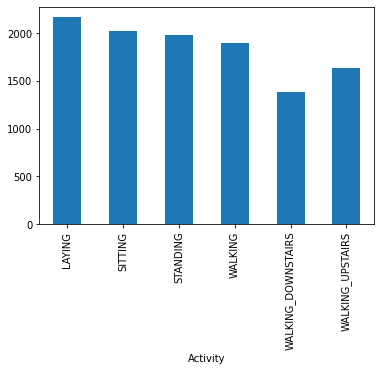

In [3]:
df.groupby('Activity').size().plot.bar()

In [4]:
# calculate important components, lambda > 1
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

train_columns= df.columns.difference(['Activity', 'ActivityType'])
df_fe_train = df[train_columns].copy()

pca = PCA()
pca.fit(df_fe_train)
pca_fe = pca.transform(df_fe_train)
components = sum(pca.explained_variance_ > 1)

In [5]:
# calculate explained variance of two first principal components
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.37758576, 0.54346153, 0.6165304 , 0.66964278, 0.70602416,
       0.73645483, 0.76388475, 0.78492481, 0.80516703, 0.82406457,
       0.84242295, 0.85665794, 0.86920698, 0.88064653, 0.88893155,
       0.8962815 , 0.90230055, 0.90799069, 0.91303336, 0.91792645,
       0.92230117, 0.92648171, 0.93031135, 0.93386109, 0.93688186,
       0.93960842, 0.94192718, 0.94409274, 0.94615881, 0.94816908,
       0.95004128, 0.9518032 , 0.95352666, 0.95511562, 0.95656354,
       0.95794923, 0.95928925, 0.96056697, 0.96176577, 0.9629388 ,
       0.9640408 , 0.96512248, 0.96614574, 0.96714204, 0.96809378,
       0.96898403, 0.96986539, 0.97073972, 0.97156193, 0.97234703,
       0.97311045, 0.97386274, 0.97457201, 0.9752681 , 0.97595028,
       0.97662055, 0.97722993, 0.97782939, 0.97840315, 0.97895238,
       0.97947684, 0.97999736, 0.98048572, 0.98096947, 0.98144358,
       0.98189569, 0.98233633, 0.98276894, 0.98318509, 0.98358579,
       0.98397718, 0.98435787, 0.98473532, 0.98508853, 0.98542

In [6]:
pca = PCA(components)
pca.fit(df_fe_train)
pca_fe = pca.transform(df_fe_train)

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

train_columns= df.columns.difference(['Activity', 'ActivityType'])
df_fe_train = df[train_columns].copy()

pca = PCA(n_components = 2)
pca.fit(df_fe_train)
pca_fe = pca.transform(df_fe_train)
df_fe_train[['pca1','pca2']] = pd.DataFrame(pca_fe)
df_fe_train['ActivityType'] = df['ActivityType']
df_fe_train['Activity'] = df['Activity']

In [8]:
# shuffle and take only 10000 points from each activity
df_fe_limited = df_fe_train.sample(frac = 1)
df_fe_limited = df_fe_limited.groupby(['Activity', 'ActivityType']).head(10000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

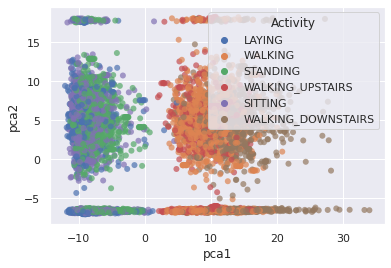

In [9]:
import seaborn as sns
from google.colab import files
sns.set()

ax = sns.scatterplot(x='pca1', y = 'pca2', hue = 'Activity', data = df_fe_limited, alpha = 0.7, linewidth = 0)
fig = ax.get_figure()
fig.savefig("scatter_activity.png", dpi=300)
files.download("scatter_activity.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

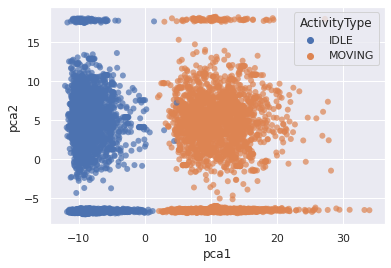

In [10]:
ax = sns.scatterplot(x='pca1', y = 'pca2', hue = 'ActivityType', data = df_fe_limited, alpha = 0.7, linewidth = 0)
fig = ax.get_figure()
fig.savefig("scatter_activitytype.png", dpi=300)
files.download("scatter_activitytype.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

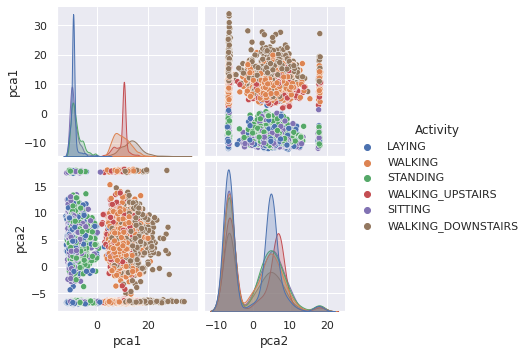

In [11]:
ax = sns.pairplot(df_fe_limited, vars=['pca1','pca2'], hue = 'Activity')
fig = ax.fig
fig.savefig("pairplot_activity.png", dpi=300)
files.download("pairplot_activity.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

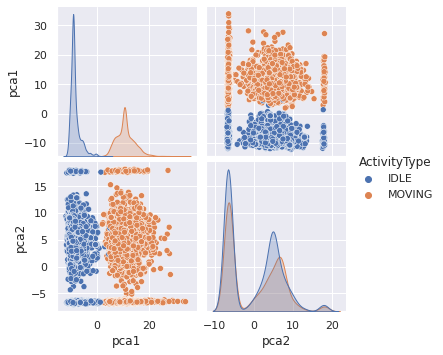

In [12]:
ax = sns.pairplot(df_fe_limited, vars=['pca1','pca2'], hue = 'ActivityType')
fig = ax.fig
fig.savefig("pairplot_activitytype.png", dpi=300)
files.download("pairplot_activitytype.png")

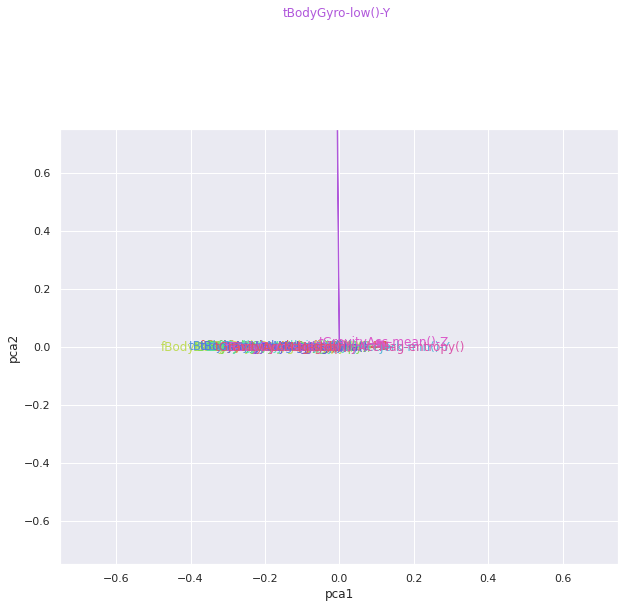

In [13]:
from numpy.linalg import norm

df_components = pd.DataFrame(pca.components_, index = ['pca1', 'pca2'], columns = train_columns).T
df_components['norm'] = df_components.apply(func = norm, axis = 1)
df_cmps_thresh = df_components[df_components['norm'] > 0.1].copy()

ar_c = len(df_cmps_thresh)     
colors = sns.color_palette('hls',ar_c)          
labels = df_cmps_thresh.index

plt.figure(figsize=(10,8))
for dx, dy, c, label in zip(df_cmps_thresh['pca1'], df_cmps_thresh['pca2'], colors, labels): 
  plt.arrow(0, 0, dx, dy, color = c, head_width = 0.02)
  plt.text(dx * 1.15, dy * 1.15, label, color = c,  ha = 'center', va = 'center')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.xlim(-0.75, 0.75)
plt.ylim(-0.75, 0.75)
plt.show()
#df_cmps_thresh